In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Simple GPT example

In [2]:
import sys, os
root = os.path.join(os.getcwd(), '../')

sys.path.append(root)

INPUT_FILE = os.path.join(root,'templates/dcgun/gpt.in')


from gpt import GPT

In [3]:
G = GPT(input_file=INPUT_FILE, verbose=True)

Configured to run in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp_r5tr5o9


In [4]:
# Available variables
G.input['variables']

{'data_dump': 0.0,
 'Master_RF': 1300000000.0,
 'MTE': 120.0,
 'gun_voltage': 300.0,
 'sol_1_current': 3.32107,
 'auto_phase': 0.0,
 'single_particle': 0.0,
 'space_charge': 1.0,
 'space_charge_type': 1.0,
 'viewscreens_on': 1.0,
 'kill_backwards_particles': 1.0,
 'optimize_on': 0.0,
 'xoffset': 0.0,
 'yoffset': 0.0,
 'RadiusMax': 0.04,
 'GBacc': 5.5,
 'xacc': 6.5,
 'dtmin': 1e-16,
 'dtmax': 1e-10,
 'ZSLA01': 0.344,
 'ZCTB01': 0.746,
 'ZSLA02': 1.16,
 'Zdcgun': 0.15,
 'Maxdcgun': 500.0,
 'SLAPolarity': -1.0,
 'LSLA01': 0.6,
 'XSLA01': 0.0,
 'YSLA01': 0.0,
 'THXSLA01': 0.0,
 'IA1SDR01_z': 0.922,
 'ZSTOP': 1.5,
 'Alpha': 1.0,
 'Fn': 0.5,
 'verror': 0.005,
 'Nstd': 5.0,
 'tree_code_theta': 1.0,
 'tree_code_R': 1e-06,
 'Ntout': 50.0,
 'tmax': 1e-08,
 'ZSTART': -0.005}

In [5]:
# Set some of these
G.set_variables({'gun_voltage':375,'sol_1_current':-3})

In [6]:
# Run
G.run()

init dir:  /Users/chrisonian/Code/GitHub/lume-gpt/examples
running GPT in /private/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp_r5tr5o9

General Particle Tracer - Oct 28 2014


# Plot

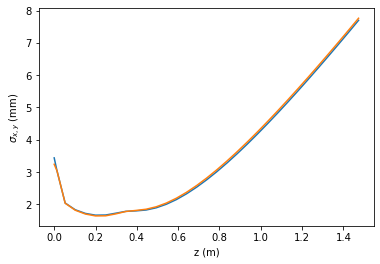

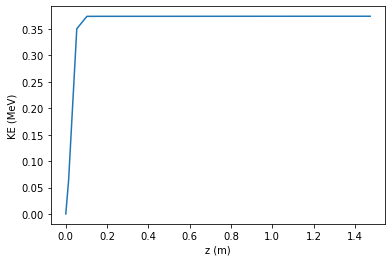

In [7]:
# Run GPT with some new settings:
from matplotlib import pyplot as plt

zavg = [tout['z'].mean() for tout in G.tout] 
xstd = [1000*tout['x'].std() for tout in G.tout] 
ystd = [1000*tout['y'].std() for tout in G.tout] 
avgKE = [0.51*(tout['G'].mean()-1) for tout in G.tout] 

plt.figure()
plt.plot(zavg,xstd, zavg,ystd)
plt.xlabel('z (m)')
plt.ylabel('$\sigma_{x,y}$ (mm)')

plt.figure()
plt.plot(zavg,avgKE)
plt.xlabel('z (m)')
plt.ylabel('KE (MeV)')
plt.show()